# Visualizing CNN Kernels
## Objective
Understand how different convolutional kernels process and extract features from images.

## Setup

In [1]:
# Import required libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D


2023-12-04 14:15:18.013149: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-04 14:15:18.013388: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-04 14:15:18.046071: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-04 14:15:18.146013: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-04 14:15:19.903924: W tensorflow/compiler/tf2

In [3]:
# Load and prepare data
path = "/home/dorota/projects/Deep-Machine-Learning-Dorota-Bjoorn/lectures/data/cat.jpg" 
img = Image.open(path).convert('L').rotate(270).resize((150,150)) 
image_array = tf.keras.utils.img_to_array(img) # Convert to tensor
image_array = tf.expand_dims(image_array, 0)  # Create a batch


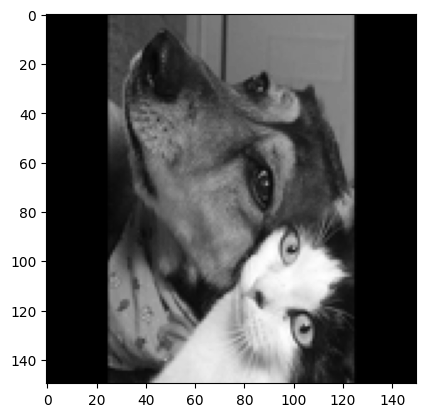

In [5]:
plt.imshow(img, cmap ='gray')

## Exercise

### Define different kernels
Create various kernels to see the different effects (edge detection, sharpening, blurring etc)

In [6]:

kernels = {
    "Edge Detection": np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),
    "Sharpen": np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]),
    "Blur": np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9.0,
}


In [10]:
kernels.items()

dict_items([('Edge Detection', array([[-1, -1, -1],
       [-1,  8, -1],
       [-1, -1, -1]])), ('Sharpen', array([[ 0, -1,  0],
       [-1,  5, -1],
       [ 0, -1,  0]])), ('Blur', array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]]))])

### Apply Kernels to the Image
Create a simple CNN model with a single convolutional layer for each kernel.
Apply the kernel to the image and display the output.

1/1 [==============================] - 0s 161ms/step


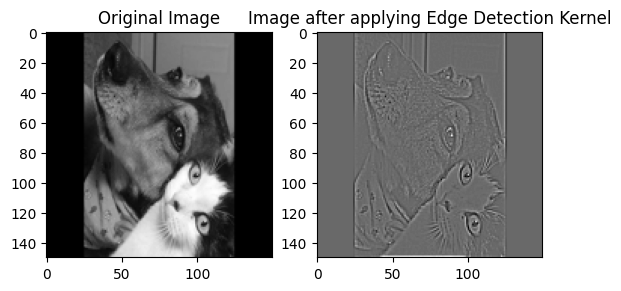

1/1 [==============================] - 0s 53ms/step


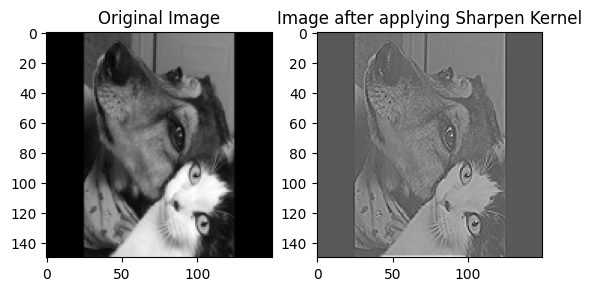

1/1 [==============================] - 0s 58ms/step


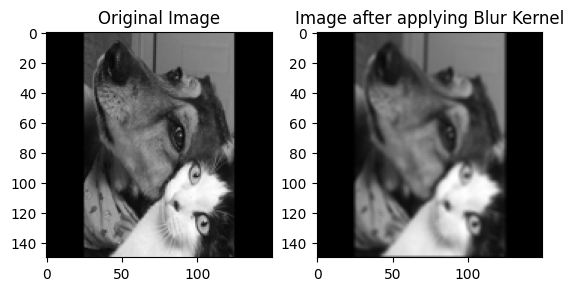

In [7]:
def apply_kernel_and_display(kernel, kernel_name, image):
    model = Sequential([
        Conv2D(filters=1, kernel_size=(3, 3), padding='same', 
               input_shape=(150, 150, 1), 
               kernel_initializer=tf.constant_initializer(kernel))
    ])

    fig = plt.figure()
    fig.add_subplot(1,2,1)
    plt.imshow(img, cmap='gray')
    plt.title("Original Image")
    

    processed_image = model.predict(image_array)
    processed_image = processed_image[0, :, :, 0]
    fig.add_subplot(1,2,2)
    plt.imshow(processed_image, cmap='gray')
    plt.title(f"Image after applying {kernel_name} Kernel")
    plt.show()

for name, kernel in kernels.items():
    apply_kernel_and_display(kernel.reshape(3, 3, 1, 1), name, image_array)


# Excercise 1
* Compare and Contrast: Discuss how each kernel affects the image differently.
* Feature Extraction: Analyze which features are highlighted by each kernel.
* Real-World Application: Relate the kernels to practical applications in image processing.

# Excercise 2
What are these kernels created to find?

1/1 [==============================] - 0s 139ms/step


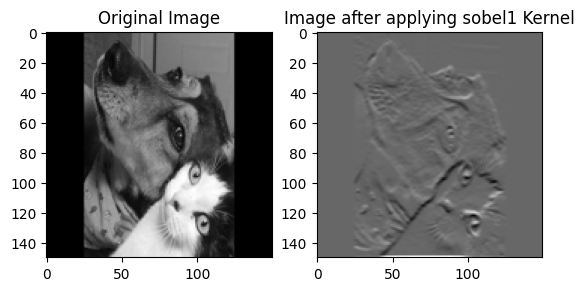

1/1 [==============================] - 0s 93ms/step


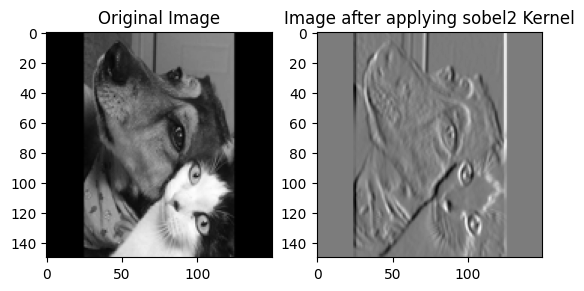

1/1 [==============================] - 0s 104ms/step


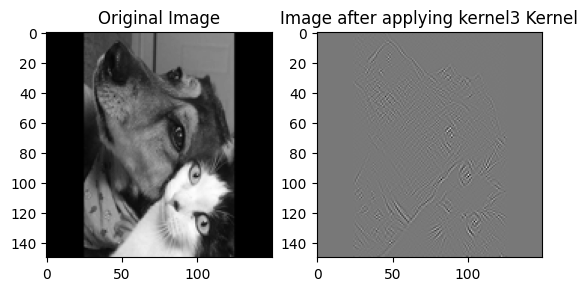

1/1 [==============================] - 0s 110ms/step


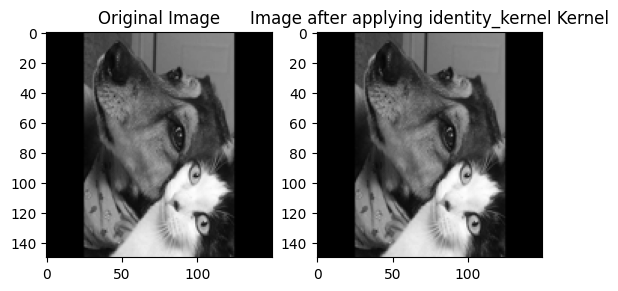

1/1 [==============================] - 0s 69ms/step


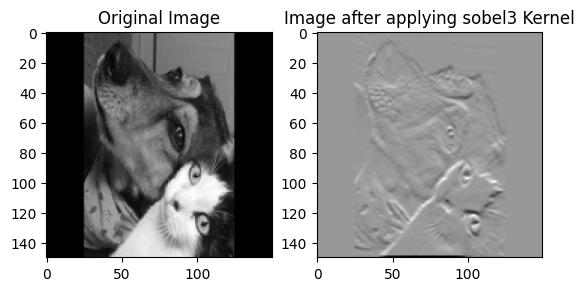

1/1 [==============================] - 0s 80ms/step


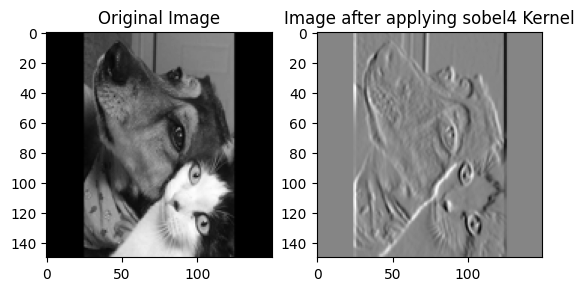

1/1 [==============================] - 0s 98ms/step


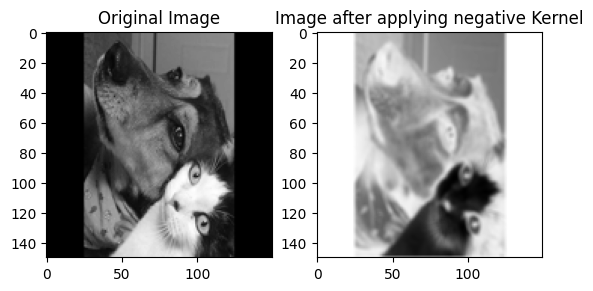

1/1 [==============================] - 0s 71ms/step


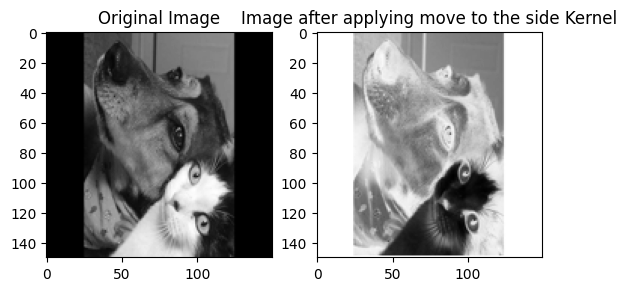

In [17]:

kernels = {
    "sobel1" :np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]), # horisontella kanter
    "sobel2": np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]), # vertikala kanter
    "kernel3": np.array([[1, -2, 1], [-2, 4, -2], [1, -2, 1]]), # diagonala kanter
    "identity_kernel": np.array([[0, 0, 0], [0, 1, 0],  [0, 0, 0]]), # identity kernel, ger nästan samma somfår in
    "sobel3": np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]), # horisontella kanter
    "sobel4": np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]), # vertikala kanter
    "negative": np.array([[-1, -1, -1], [-1, -1, -1], [-1, -1, -1]]), # vertikala kanter
    'move to the side': np.array([[0, 0, 0], [0, 0, 0], [0, 0, -1]])
}

for name, kernel in kernels.items():
    apply_kernel_and_display(kernel.reshape(3, 3, 1, 1), name, image_array)


## Bonus Exercise:
Play around with the filters and see if you can create your own that finds some interensting feature.